# **Mall Customer Segmentation**

## **1. import used libraries** 

In [309]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans

## **2. import mall customers data & data wrangling**

In [313]:
df = pd.read_csv("F:\courses\iti\ITI Power bi\Data Mining\day2\Mall_Customers.csv")
df.drop('CustomerID',axis=1,inplace=True)
df.rename({'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},axis=1,inplace=True)
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## **3. EDA (Exploratory Data Analysis)**

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [315]:
df.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

In [316]:
df.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

**3.1 descriptive analysis of qualitative features** 

In [317]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


**3.2 Analyzing gender category by counting**

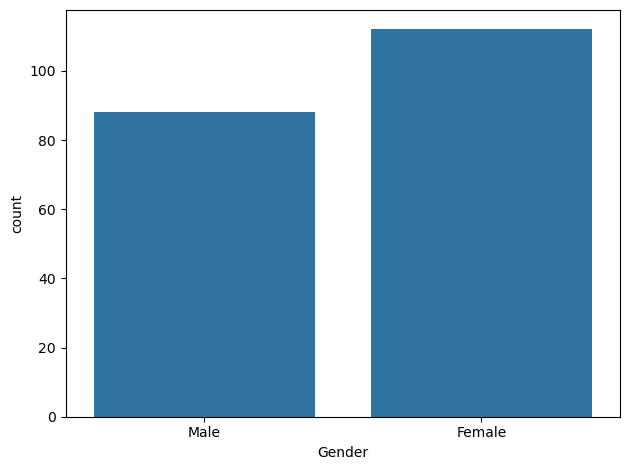

In [318]:
sns.countplot(x=df.Gender)
plt.tight_layout()
plt.show()

in our data set looks like females is more than the males as the females tend to make more shoppings than the male

**3.3 Analyzing Age by looking into it's distribution**

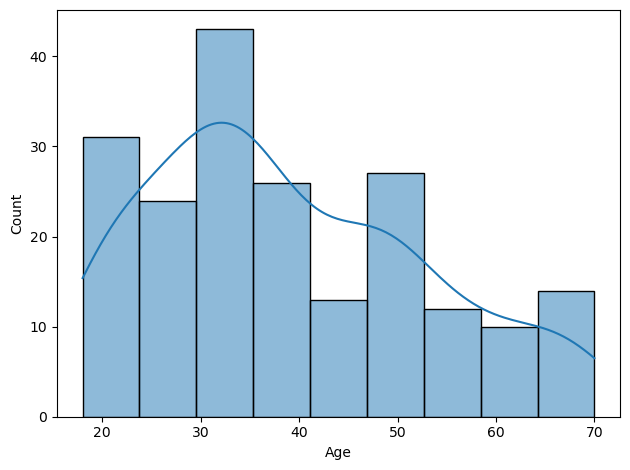

In [319]:
sns.histplot(x=df.Age,kde=True)
plt.tight_layout()
plt.show()

In [ ]:
mean = round(df.Age.mean(),0)
median = round(df.Age.median(),0)
print(f'the mean age of the {mean}')
print(f'50% of pur customer is below {median}')

the mean age of the 39.0
50% of pur customer is below 36.0


the Age distribution is tend to be more like a right skewed distribution where the mean of the data is higher than the median, that means that most of our customers are more of youth people less than 36 years old

**3.4 Analyzing customer's income by looking into it's distribution**

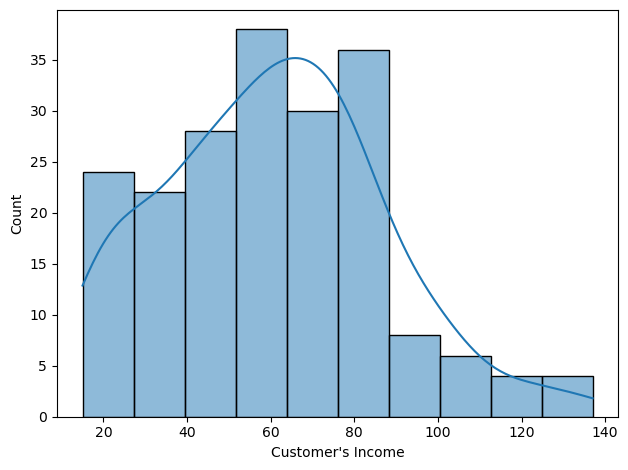

In [ ]:
sns.histplot(x=df['Income'],kde=True)
plt.tight_layout()
plt.show()

In [327]:
mean = round(df.Income.mean(),0)
median = round(df.Income.median(),0)
print(f'the mean income of the {mean}')
print(f'50% of pur customer is below {median}$')

the mean income of the 61.0
50% of pur customer is below 62.0$


the income distribution is tend to be more like a left skewed distribution where the mean of the data is higher than the median

**3.5 Analyzing customer's spending score by looking into it's distribution**

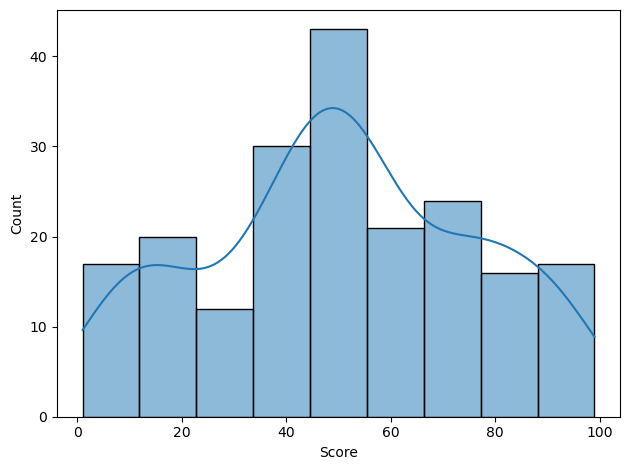

In [330]:
sns.histplot(data=df['Score'],kde=True)
plt.tight_layout()
plt.show()

In [329]:
mean = round(df.Score.mean(),0)
median = round(df.Score.median(),0)
print(f'the mean score of the {mean}')
print(f'50% of pur customer is below {median} as spending score')

the mean score of the 50.0
50% of pur customer is below 50.0 as spending score


the mean and median are exactly the same as that the distribution of spending data score is normally distributed 

**3.6 Analyzing customer's income by age for each gender**

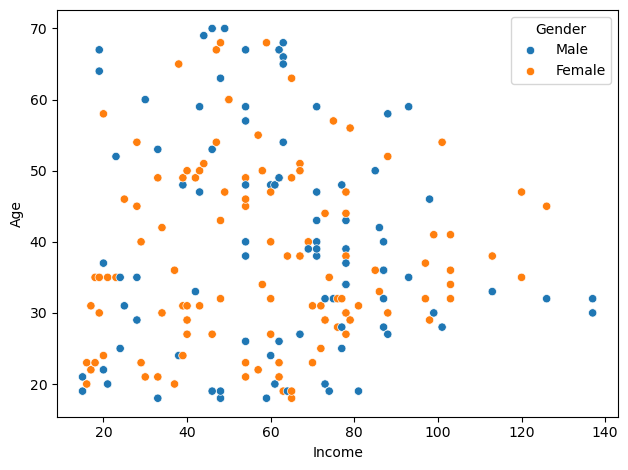

In [336]:
sns.scatterplot(x=df['Income'],y=df["Age"],hue=df['Gender'])
plt.tight_layout()
plt.show()

looks like there is no pattern or cluster or even a relationship between the income and age

**3.7 Analyzing spending score by age**

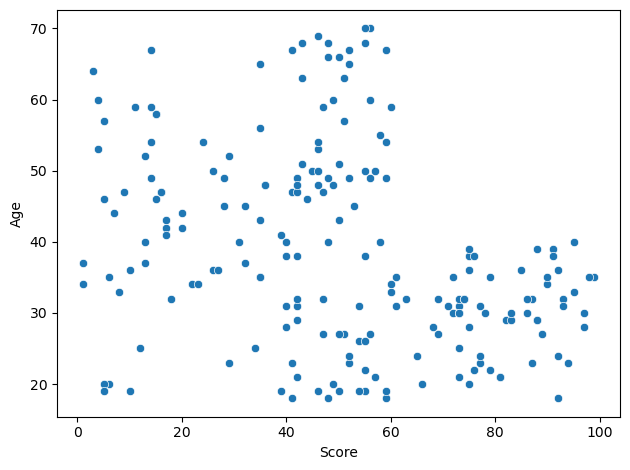

In [334]:
sns.scatterplot(x=df['Score'],y=df["Age"])
plt.tight_layout()
plt.show()

looks like there is no pattern or cluster or even a relationship between the spending score and age

**3.8 Analyzing customer's income by spending score**

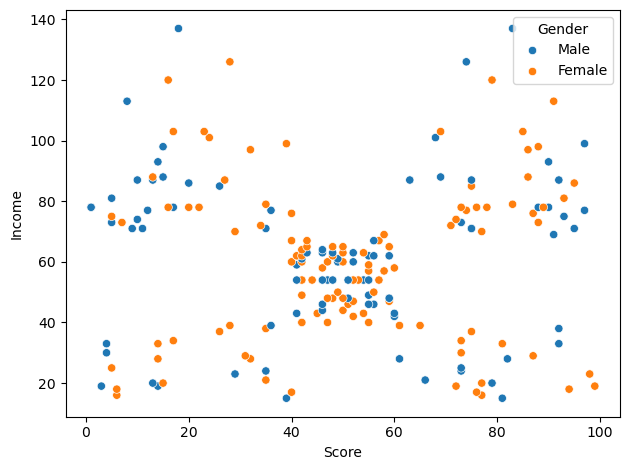

In [333]:
sns.scatterplot(x=df['Score'],y=df["Income"],hue=df['Gender'])
plt.tight_layout()
plt.show()

**This is the most informative visualization till now, as we can observe about 5 clusters:**
1. Low Score, Low Income
2. Low Score, High Income
3. Mid Score, Mid Income
4. High Score, Low Income
5. High Score, High Income

**Considering only those two features**

## **4. Clustering using K-means**

**4.1 feature selection and preprocessing**

In [337]:
X = df[['Score',"Income"]].values

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

km = KMeans(n_clusters= 5, init='k-means++', random_state=42)
y_pred = km.fit_predict(X_Scaled)

c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [210]:
km.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [211]:
len(y_pred)

200

In [214]:
km.inertia_

65.56840815571682

In [238]:
km.score(X_Scaled)

-65.56840815571682

**4.2 clusters visualizations after model training** 

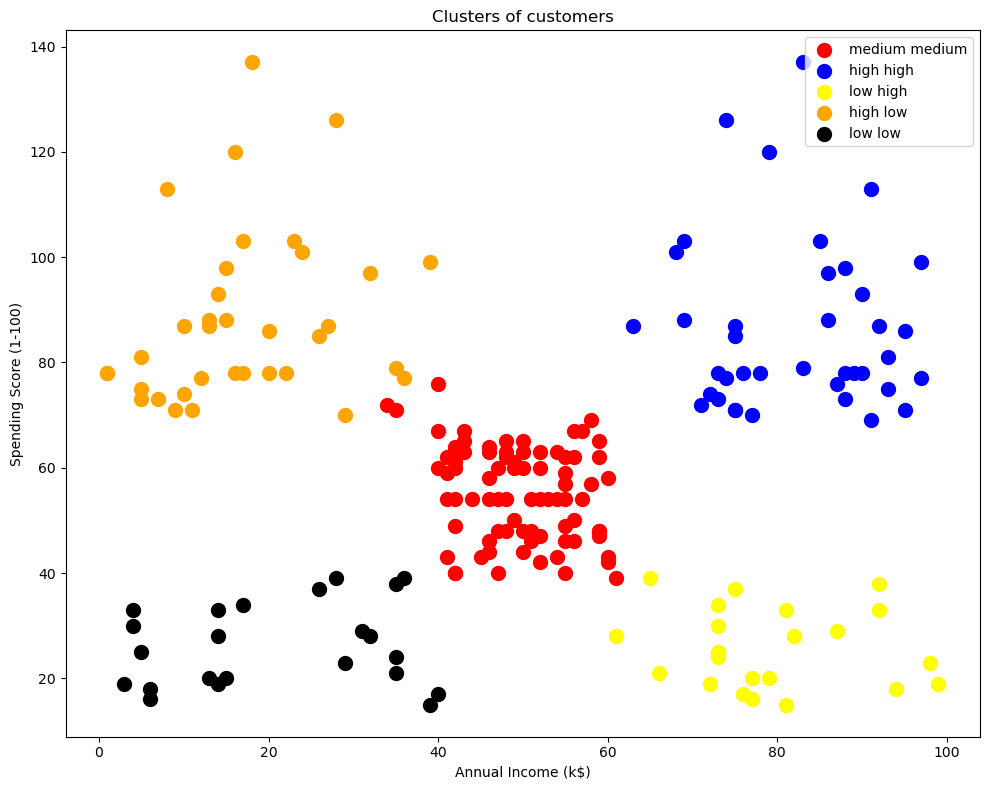

In [248]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'medium medium')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'high high')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'yellow', label = 'low high')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'orange', label = 'high low')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'black', label = 'low low')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.legend()
plt.show()


**4.3 inertia calculation and visualization through the elbow method**

In [249]:
inertia = []
k_range = range(2,10)

for i in k_range:
    kms = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kms.fit(X)
    inertia.append(kms.inertia_)

inertia 

c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ibrah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

[183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.47160979344]

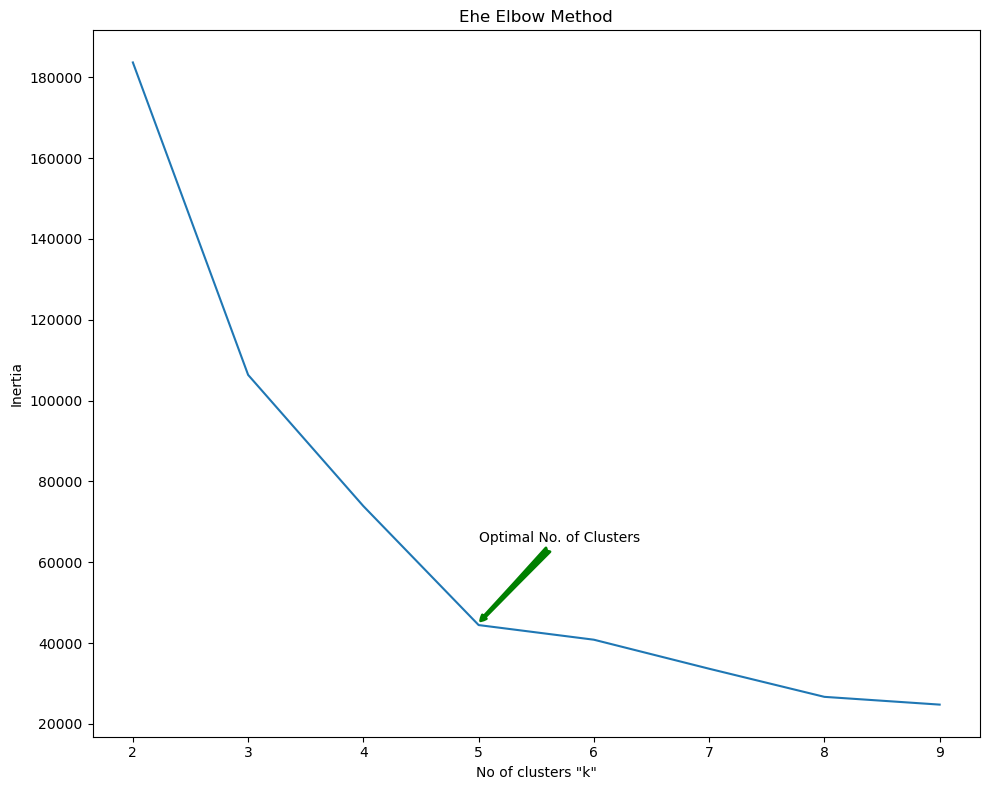

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

sns.lineplot(x=k_range, y=inertia, ax=ax)
plt.title('Ehe Elbow Method')
plt.xlabel('No of clusters "k"')
plt.ylabel('Inertia')
plt.tight_layout()
ax.annotate(text='Optimal No. of Clusters',xy=(5,45000),xytext=(5,65000),xycoords='data',arrowprops=dict(arrowstyle='fancy',connectionstyle='arc3',color='green',lw=2))
plt.show()

the final conclusion that WCSS (within clusters sum of squares) is the lowest in the 5 clusters mark as 5 clusters is the optimal number of clusters